In [5]:
import sys,os,glob
from astropy.io import fits
from astropy.table import Table
from astropy.nddata import extract_array
from astropy.coordinates import SkyCoord
from astropy import wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from astropy.visualization import (simple_norm,LinearStretch)

import jhat
from jhat import jwst_photclass,st_wcs_align

In [6]:
obs_table1 = Observations.query_criteria(obs_id='jw01069-c1000_t002_nircam_clear-f200w')
data_products_by_obs = Observations.get_product_list(obs_table1)
data_products_by_obs = data_products_by_obs[data_products_by_obs['calib_level']==2]
data_products_by_obs = data_products_by_obs[data_products_by_obs['productSubGroupDescription']=='CAL'][0]
Observations.download_products(data_products_by_obs,extension='fits')

2023-01-02 10:14:34,734 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01069002002_06101_00001_nrca1/jw01069002002_06101_00001_nrca1_cal.fits with expected size 117538560.


INFO: Found cached file ./mastDownload/JWST/jw01069002002_06101_00001_nrca1/jw01069002002_06101_00001_nrca1_cal.fits with expected size 117538560. [astroquery.query]


<Table length=1>
                                         Local Path                                           Status  Message  URL  
                                           str92                                               str8    object object
-------------------------------------------------------------------------------------------- -------- ------- ------
./mastDownload/JWST/jw01069002002_06101_00001_nrca1/jw01069002002_06101_00001_nrca1_cal.fits COMPLETE    None   None

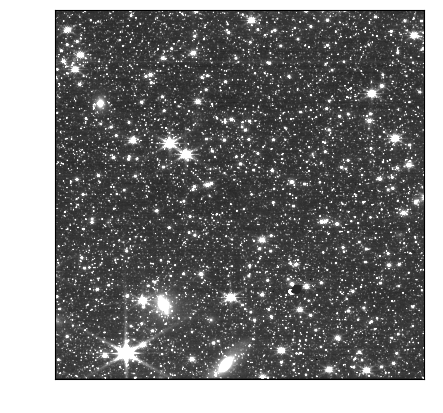

In [3]:
ref_image = glob.glob('mastDownload/JWST/*nrca1*/*cal.fits')[0]

ref_fits = fits.open(ref_image)
ref_data = fits.open(ref_image)['SCI',1].data
norm1 = simple_norm(ref_data,stretch='linear',min_cut=-.5,max_cut=3)

plt.imshow(ref_data, origin='lower',
                      norm=norm1,cmap='gray')
plt.gca().tick_params(labelcolor='none',axis='both',color='none')
plt.show()

2023-01-02 12:20:10,148 - stpipe.SourceCatalogStep - INFO - SourceCatalogStep instance created.
2023-01-02 12:20:11,269 - stpipe.SourceCatalogStep - INFO - Using APCORR reference file: /grp/crds/cache/references/jwst/jwst_nircam_apcorr_0004.fits
2023-01-02 12:20:11,351 - stpipe.SourceCatalogStep - INFO - Using ABVEGAOFFSET reference file: /grp/crds/cache/references/jwst/jwst_nircam_abvegaoffset_0001.asdf
2023-01-02 12:20:11,352 - stpipe - INFO - Instrument: NIRCAM
2023-01-02 12:20:11,353 - stpipe - INFO - Detector: NRCA1
2023-01-02 12:20:11,354 - stpipe - INFO - Filter: F200W
2023-01-02 12:20:11,355 - stpipe - INFO - Pupil: CLEAR
2023-01-02 12:20:11,355 - stpipe - INFO - Subarray: FULL
2023-01-02 12:20:11,485 - stpipe - WARNING - model.meta.resample.pixel_scale_ratio was not found. Assuming the native detector pixel scale (i.e., pixel_scale_ratio = 1)
2023-01-02 12:20:36,593 - stpipe - INFO - Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Number of stars: 1269
### NO propoer motion correction!!!
Number of stars after removing nan's: 1269
*** Note: close plot to continue!


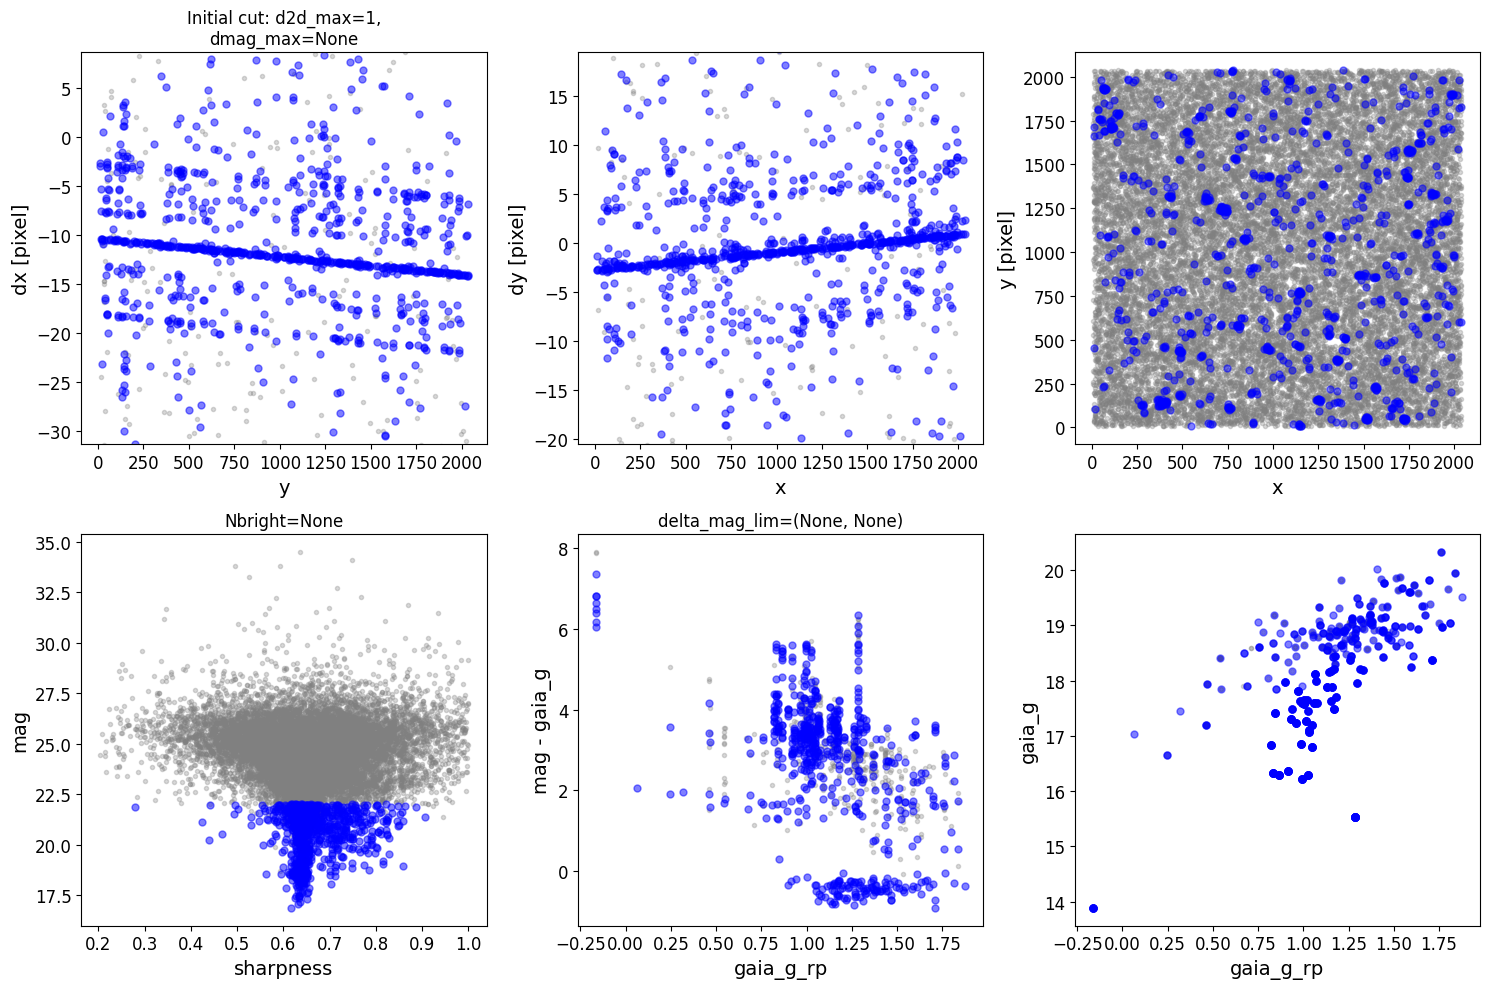

    slope  intercept     maxval  index  d_bestguess  fwhm  multimax
-0.001904       1.95 285.117336    107   -12.229384   0.8     False
Keeping 338 out of 338, skippin 0 because of null values in columns d_rot_tmp
median: -12.264859
75.000000 percentile cut: max residual for cut: 0.114912
median: -12.260907
i:00 mean:-12.260907(0.003562) stdev:0.056539(0.002513) X2norm:1.00 Nchanged:0 Ngood:253 Nclip:85

mean: -12.268443
i:01 mean:-12.268443(0.004209) stdev:0.071433(0.002971) X2norm:1.00 Nchanged:36 Ngood:289 Nclip:49

mean: -12.270694
i:02 mean:-12.270694(0.004661) stdev:0.080994(0.003290) X2norm:1.00 Nchanged:14 Ngood:303 Nclip:35

mean: -12.271443
i:03 mean:-12.271443(0.004879) stdev:0.085489(0.003444) X2norm:1.00 Nchanged:5 Ngood:308 Nclip:30

mean: -12.273078
i:04 mean:-12.273078(0.004983) stdev:0.087601(0.003518) X2norm:1.00 Nchanged:2 Ngood:310 Nclip:28

mean: -12.273078
i:05 mean:-12.273078(0.004983) stdev:0.087601(0.003518) X2norm:1.00 Nchanged:0 Ngood:310 Nclip:28


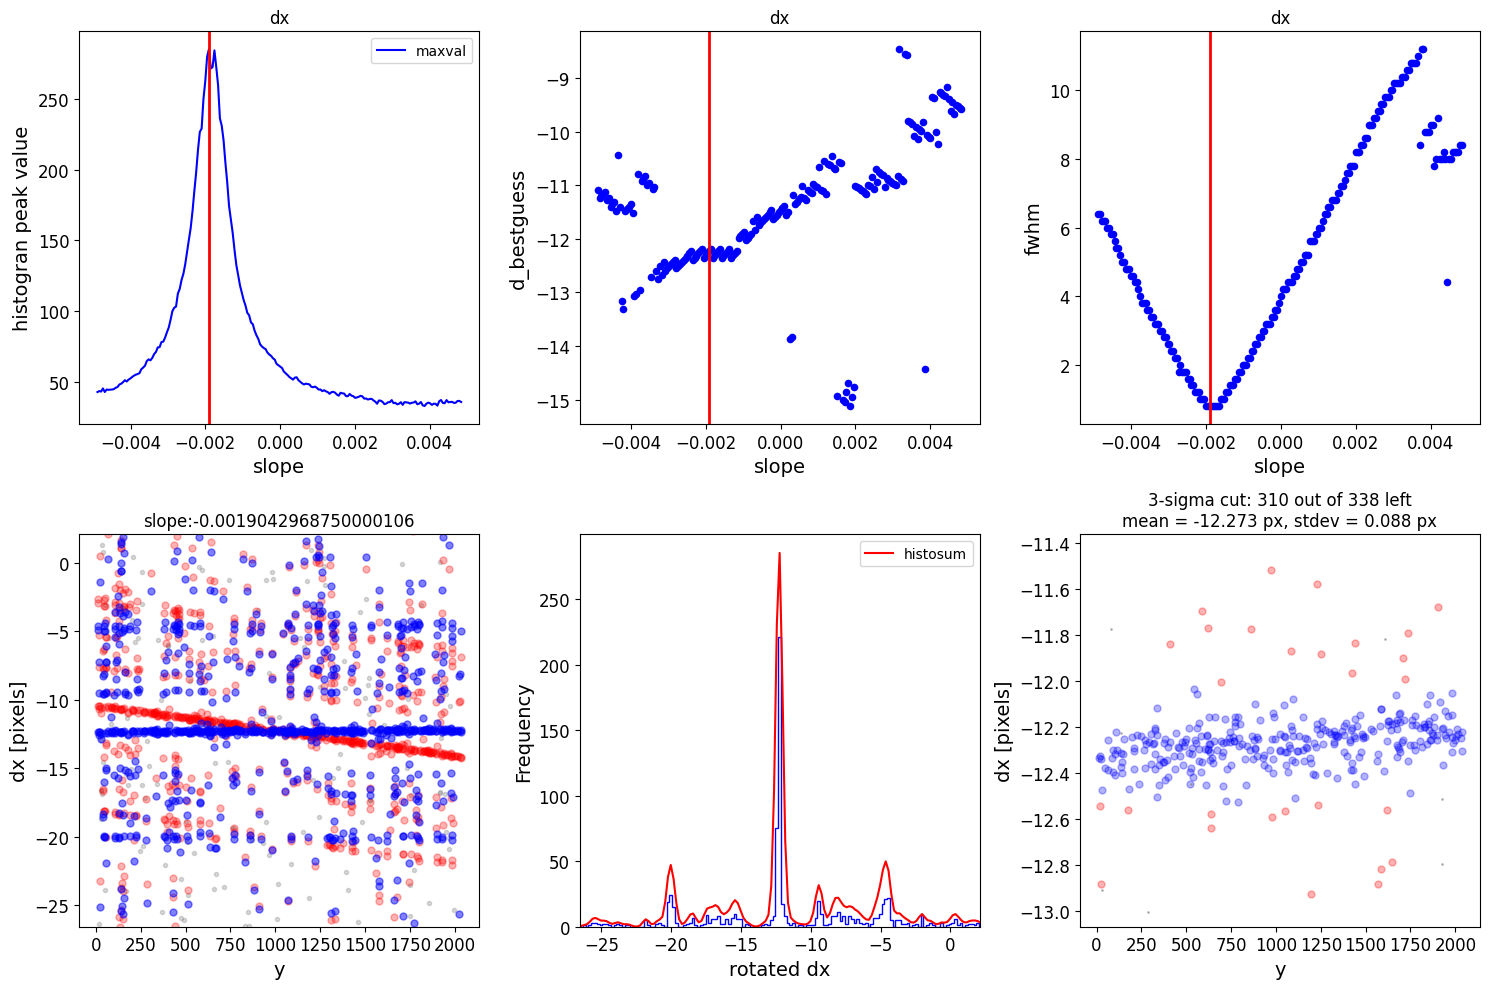

   slope  intercept     maxval  index  d_bestguess  fwhm  multimax
0.001904      -1.95 265.507388     89    -0.928732   0.8     False
Keeping 304 out of 304, skippin 0 because of null values in columns d_rot_tmp
median: -0.887293
75.000000 percentile cut: max residual for cut: 0.114715
median: -0.891438
i:00 mean:-0.891438(0.004094) stdev:0.061676(0.002888) X2norm:1.00 Nchanged:0 Ngood:228 Nclip:76

mean: -0.892418
i:01 mean:-0.892418(0.004913) stdev:0.081621(0.003468) X2norm:1.00 Nchanged:49 Ngood:277 Nclip:27

mean: -0.885567
i:02 mean:-0.885567(0.005443) stdev:0.093017(0.003842) X2norm:1.00 Nchanged:16 Ngood:293 Nclip:11

mean: -0.884728
i:03 mean:-0.884728(0.005707) stdev:0.098346(0.004028) X2norm:1.00 Nchanged:5 Ngood:298 Nclip:6

mean: -0.884731
i:04 mean:-0.884731(0.005828) stdev:0.100780(0.004114) X2norm:1.00 Nchanged:2 Ngood:300 Nclip:4

mean: -0.884731
i:05 mean:-0.884731(0.005828) stdev:0.100780(0.004114) X2norm:1.00 Nchanged:0 Ngood:300 Nclip:4


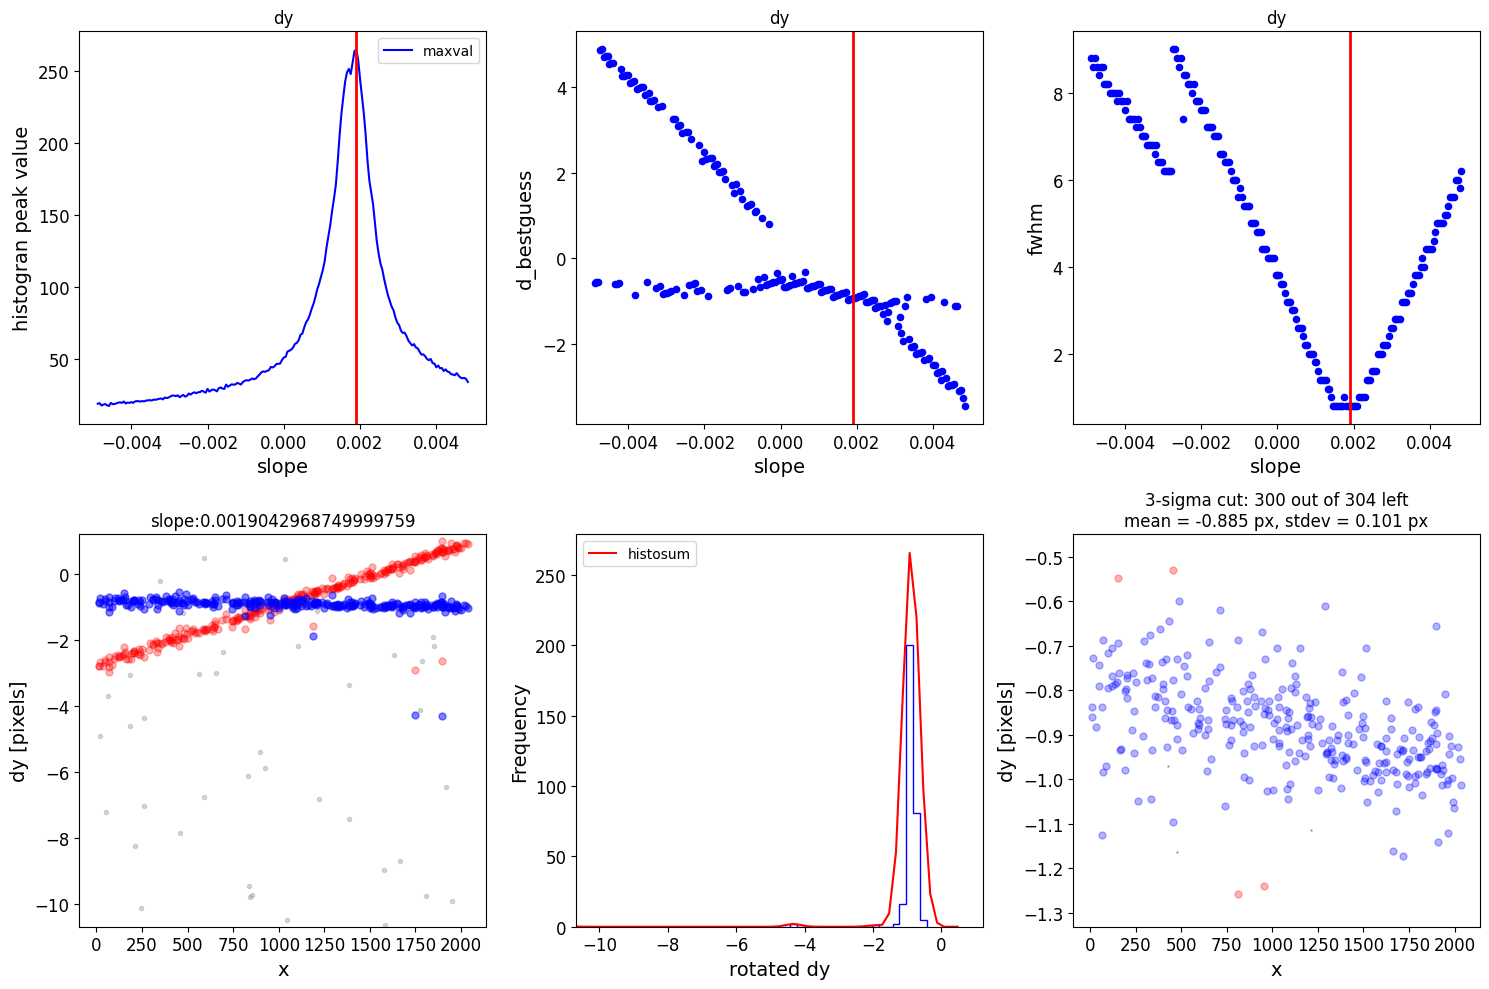

*** Note: close plots to continue!


<Figure size 640x480 with 0 Axes>

2023-01-02 12:20:41,408 - stpipe.TweakRegStep - INFO - TweakRegStep instance created.
2023-01-02 12:20:41,748 - stpipe.TweakRegStep - INFO - Step TweakRegStep running with args ([<ImageModel(2048, 2048) from jw01069002002_06101_00001_nrca1_cal.fits>],).
2023-01-02 12:20:41,751 - stpipe.TweakRegStep - INFO - Step TweakRegStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/Users/arest/nircam/jhat/notebooks/mastDownload/jw01069002002_06101_00001_nrca1_tweakregstep.fits', 'output_dir': './mastDownload', 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 50, 'brightest': 4000, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 4, 'searchrad': 0.5, 'use2dhist': True, 'separation': 9, 'tolerance': 0.7, 'xoffset': 0, 'yoffset': 0, 'fitgeo

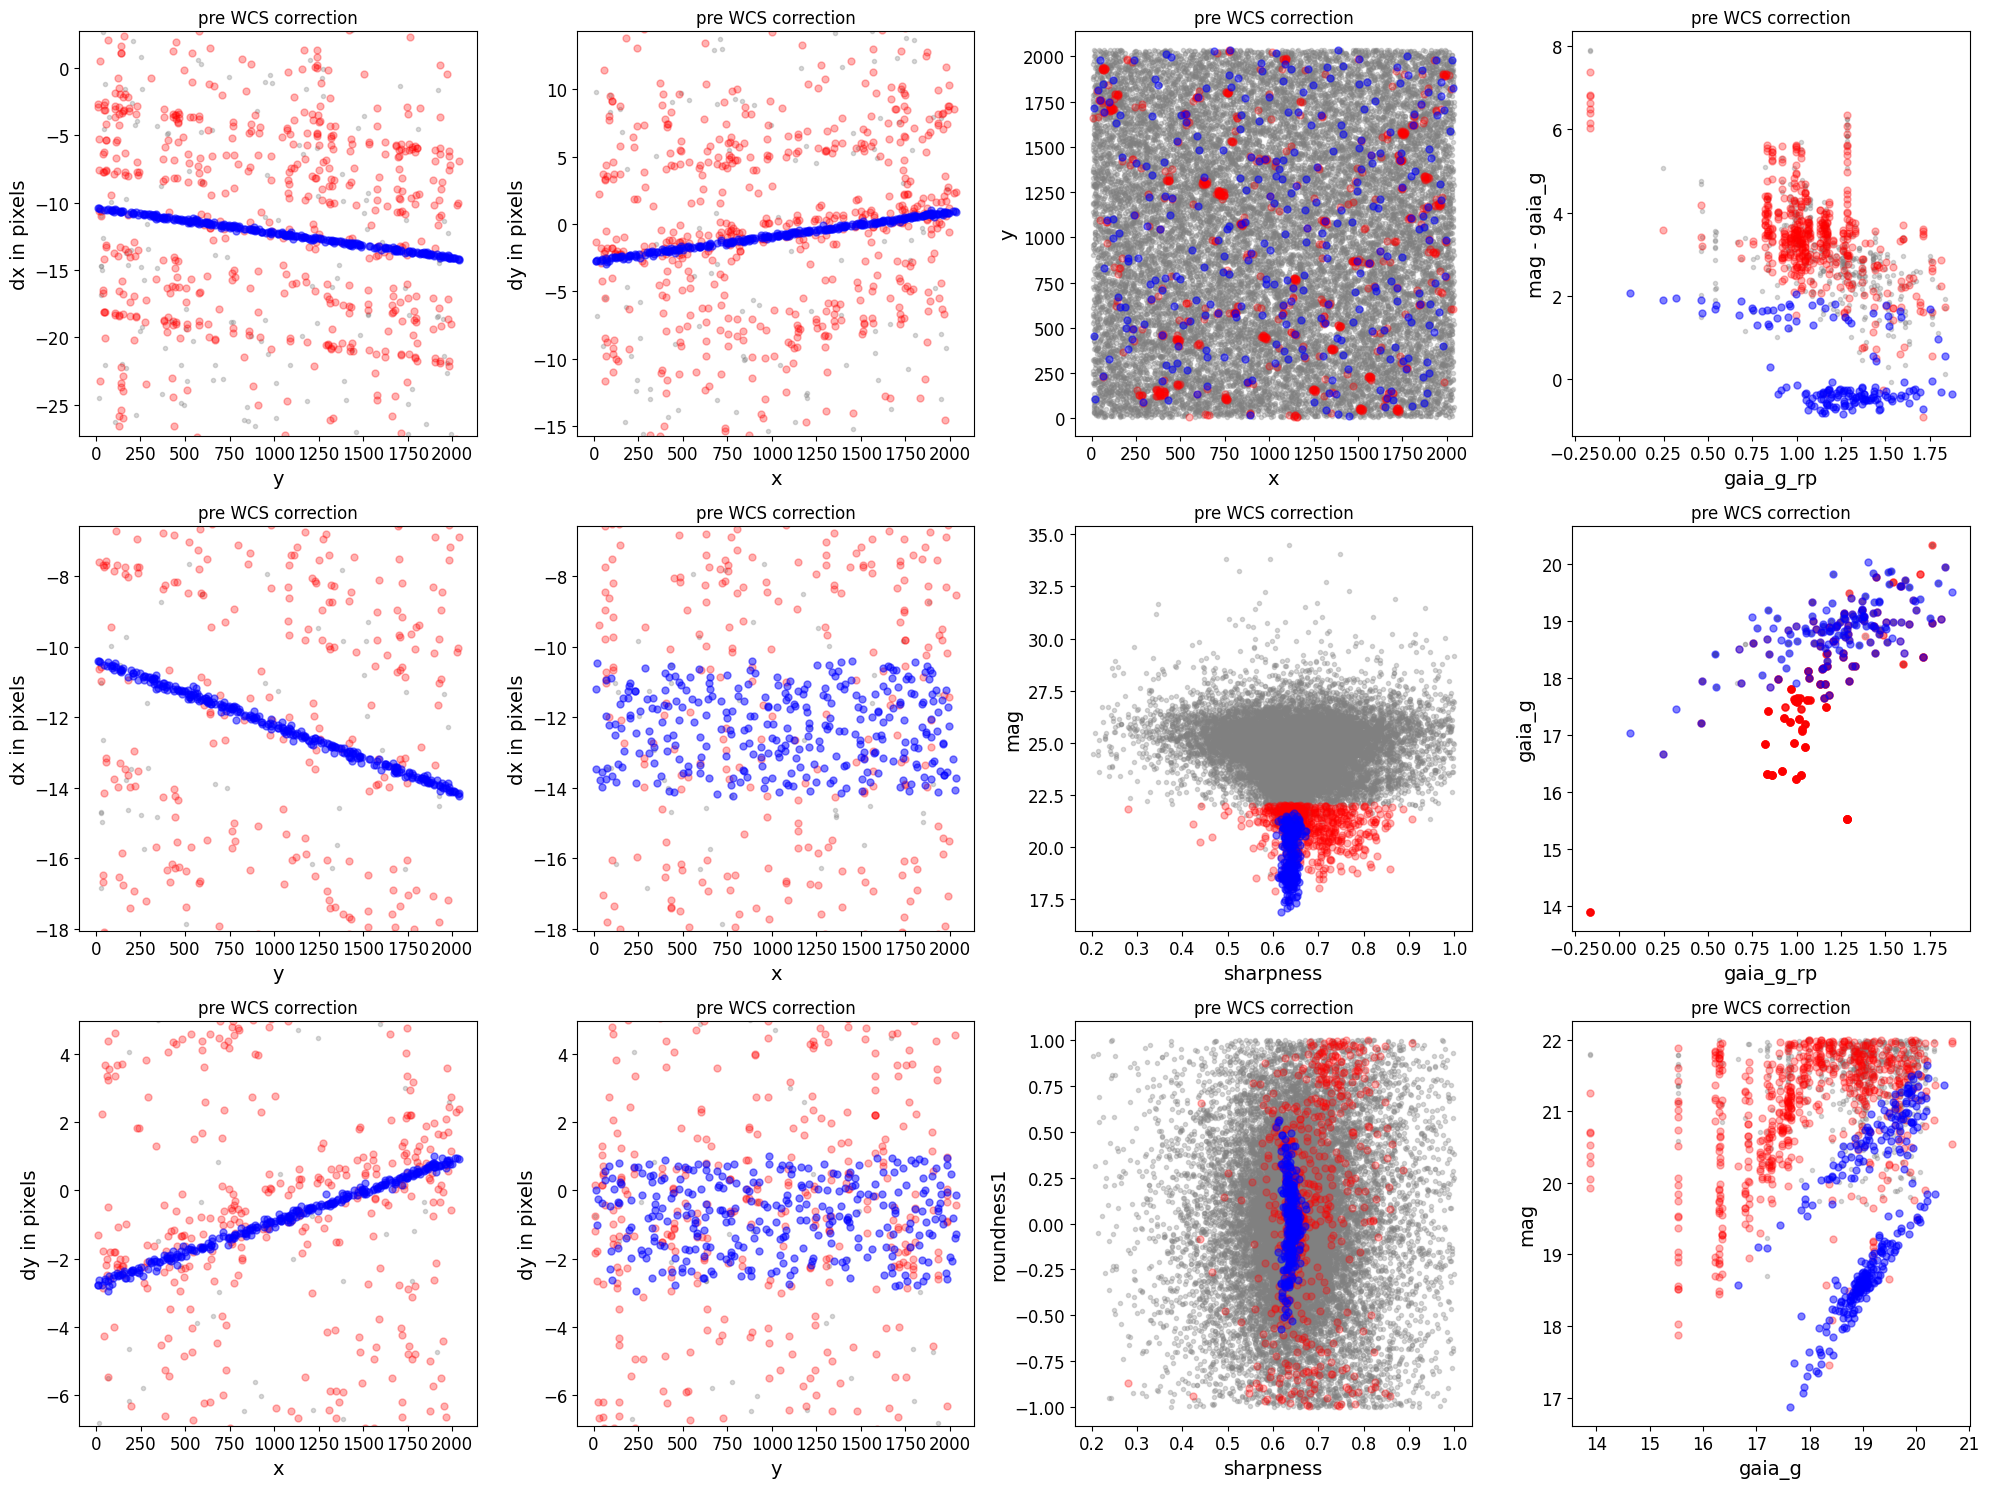

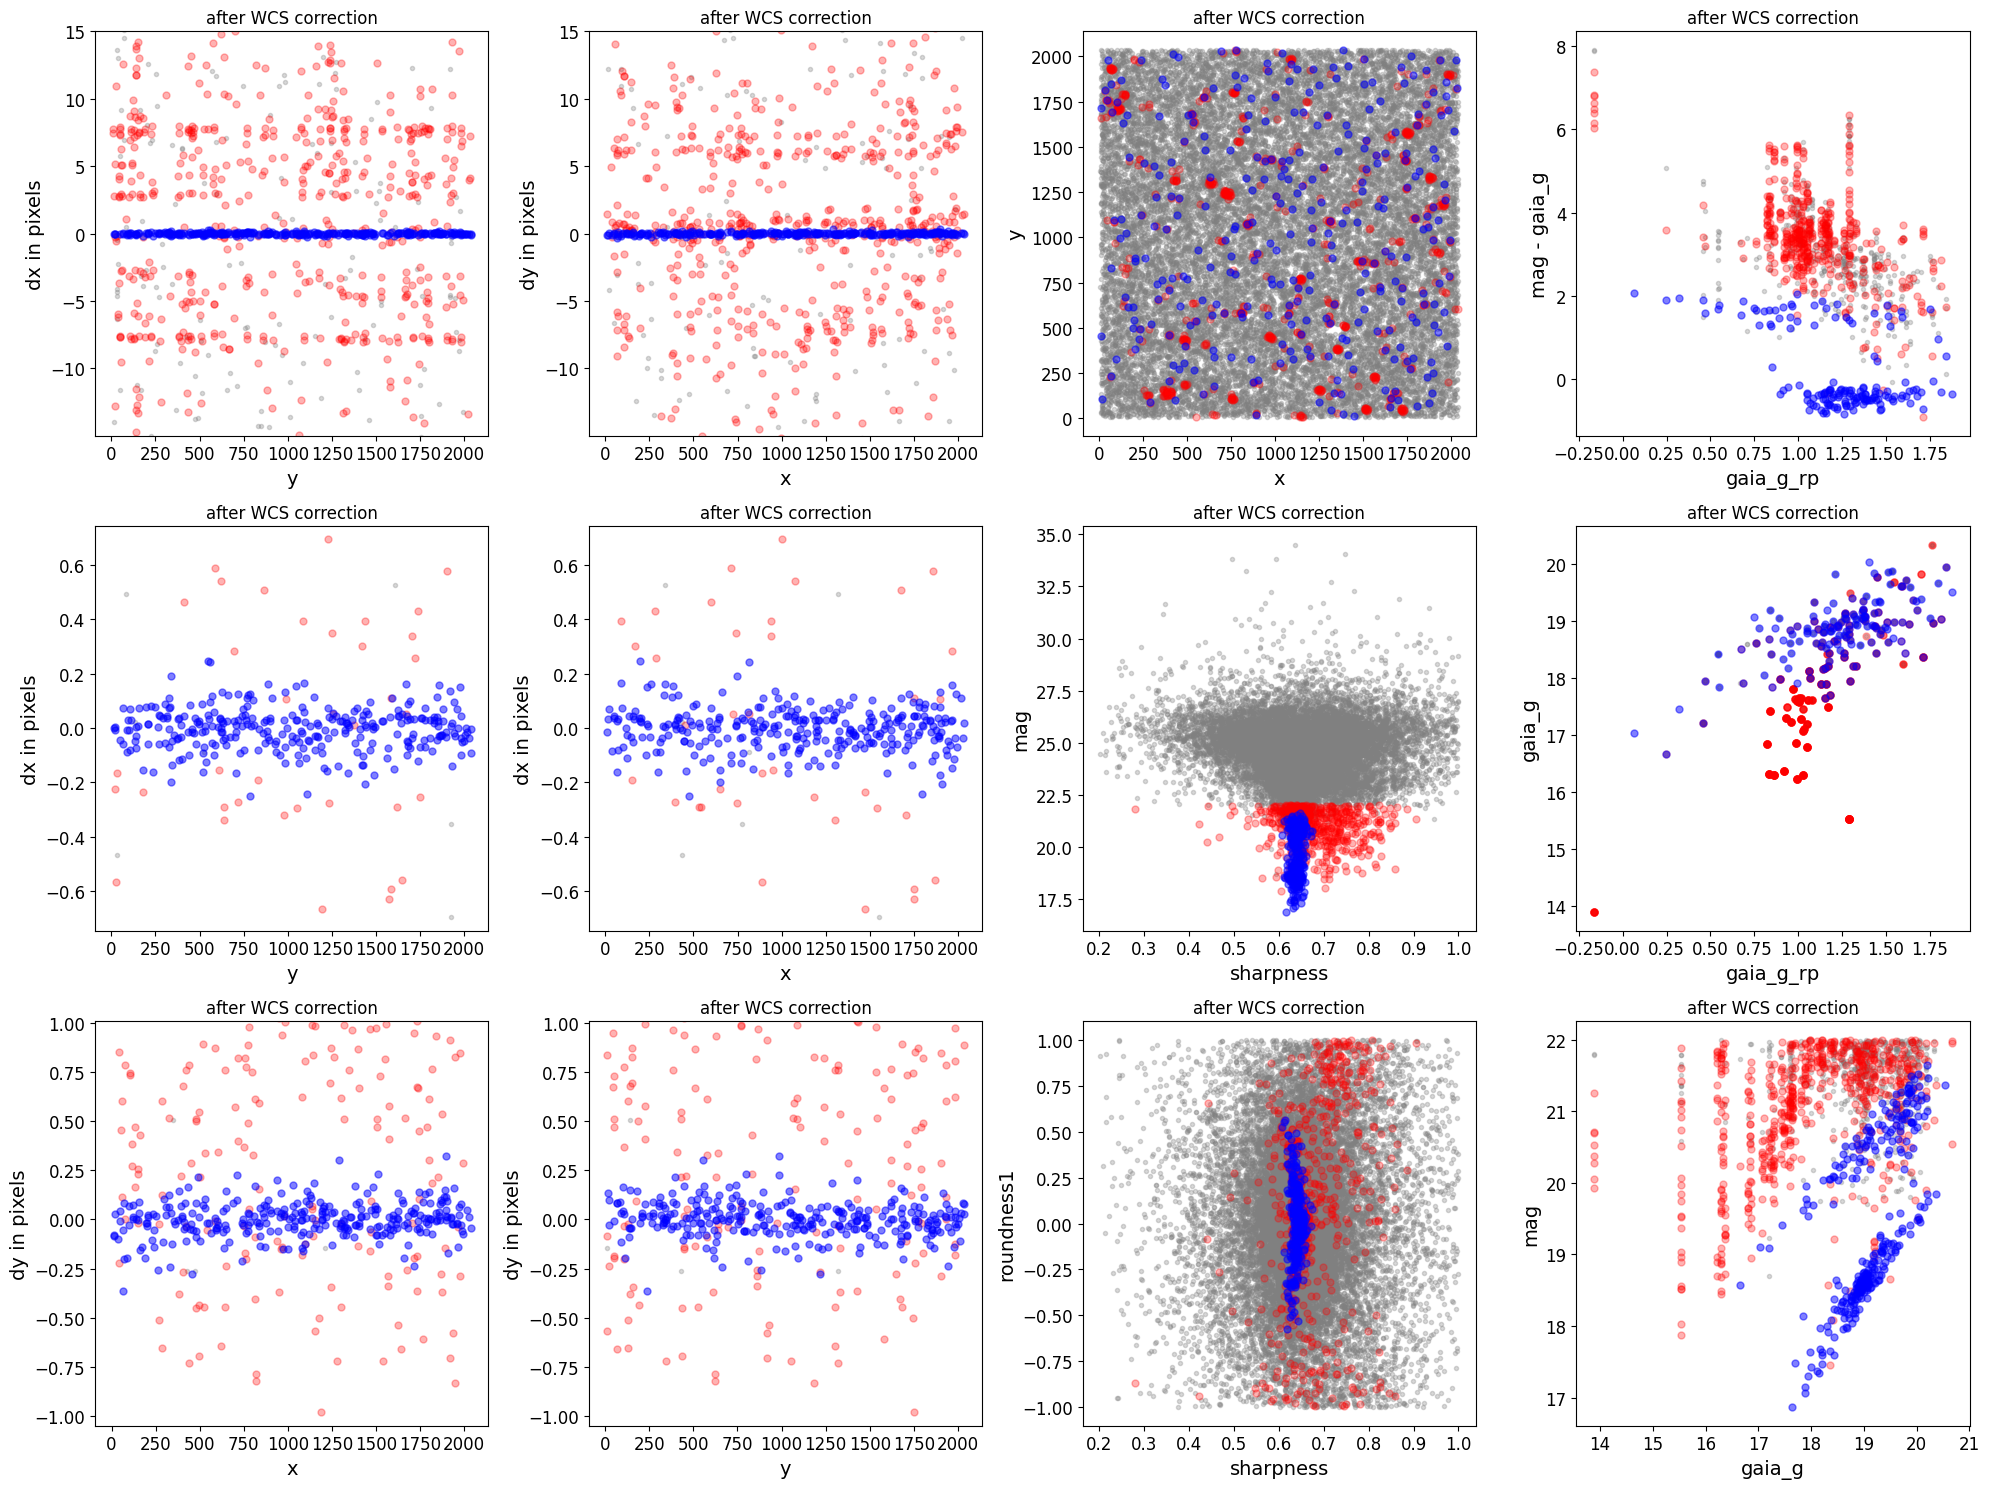

*** Note: close plots to continue!


0

In [9]:
wcs_align = st_wcs_align()
wcs_align.run_all(ref_image,
              telescope='jwst',
              outsubdir='mastDownload',
              overwrite=True,
              d2d_max=1, # d2d_max=1" is the limit on the maximum distance between matches. 1" is about 30 pixels
              showplots=2,
              refcatname='Gaia',
              histocut_order='dxdy',
              sharpness_lim=(0,10),
              roundness1_lim=(-10, 10),
              SNR_min= 3,
              objmag_lim =(10,22) # Gaia is shallow and typically matches down to 21.5 in NIRCam filters
            )
